In [1]:
from fastai.text import *
import numpy as np
from sklearn.model_selection import train_test_split
import pickle
import sentencepiece as spm
import re
import pdb

In [2]:
import fastai, torch
fastai.__version__ , torch.__version__

('1.0.40', '1.0.0')

In [3]:
torch.cuda.set_device(0)

In [4]:
!pwd

/home/gaurav/PycharmProjects/nlp-for-oriya/classification


In [5]:
path = Path('/home/gaurav/PycharmProjects/nlp-for-oriya/classification')

In [6]:
!ls

Odia_Classification_Model.ipynb  Odia_News_Classification.csv


In [7]:
df = pd.read_csv(path/'Odia_News_Classification.csv')
df.tail()

,headings,label
18996,ବିସିସିଆଇର ନିଷ୍ପତ୍ତି : ଆଇପିଏଲ-୨୦୧୯ର ଉଦଘାଟନୀ ସମ...,sports
18997,ଅମୃତଜୟଙ୍କୁ ଦ୍ୱିମୁକୁଟ,sports
18998,ଶେଷ ସର୍ଦାରଙ୍କ ପ୍ରଥମ ଖୁଲାସା: ଜନ୍‌ ଦେଇଥିଲେ ଅସମ୍...,sports
18999,ସହିଦ ସ୍ପୋର୍ଟିଂ-ଜୁଭେନାଇଲ୍‌ ଫାଇନାଲ୍‌ ଆଜି,sports
19000,ମେସି ପୁଣି ଫିକା : ଆର୍ଜେଣ୍ଟିନାର ଶୋଚନୀୟ ପରାଜୟ,sports


In [8]:
df['label'].unique()

array(['entertainment', 'business', 'sports'], dtype=object)

In [9]:
print('Entertainment', (df['label'] == 'entertainment').sum())
print('Business', (df['label'] == 'business').sum())
print('Sports', (df['label'] == 'sports').sum())

Entertainment 4572
Business 5779
Sports 8650


In [10]:
df['headings'][0]

' ଚାରିବର୍ଷ ପରେ ରିତିକ୍\u200cଙ୍କ ସହ କାଟ୍ରିନା କରିବେ ବ୍ୟାଙ୍ଗ୍\u200c… '

In [11]:
df.shape

(19001, 2)

In [13]:
df[df['headings'].isnull()].shape

(0, 2)

In [14]:
label_cols = list(range(1,df.shape[1]))

In [15]:
print(label_cols)

[1]


In [16]:
id_to_col = list(df.columns)

In [17]:
col_to_id = {}
for i, col in enumerate(id_to_col):
    col_to_id[col] = i

In [18]:
class OriyaTokenizer(BaseTokenizer):
    def __init__(self, lang:str):
        self.lang = lang
        self.sp = spm.SentencePieceProcessor()
        self.sp.Load(str(path/"../tokenizer/oriya_lm.model"))
        
    def tokenizer(self, t:str) -> List[str]:
        return self.sp.EncodeAsPieces(t)

In [19]:
sp = spm.SentencePieceProcessor()
sp.Load(str(path/"../tokenizer/oriya_lm.model"))
itos = [sp.IdToPiece(int(i)) for i in range(15000)]

In [20]:
# 15,000 is the vocab size that we chose in sentencepiece
oriya_vocab = Vocab(itos)

In [21]:
tokenizer = Tokenizer(tok_func=OriyaTokenizer, lang='or')

In [23]:
tokenizer.special_cases

['xxunk', 'xxpad', 'xxbos', 'xxfld', 'xxmaj', 'xxup', 'xxrep', 'xxwrep']

In [24]:
data_lm = TextDataBunch.from_csv(path=path, csv_name='Odia_News_Classification.csv', text_cols=[0], label_cols=label_cols, tokenizer=tokenizer, vocab=oriya_vocab)

In [25]:
data_lm.save()

In [26]:
bs=48

In [27]:
data_lm = TextLMDataBunch.load(path, 'tmp', bs=bs)

In [28]:
data_lm.show_batch()

idx,text
0,▁x x b os ▁ଫର୍ମ କୁ ▁ଫେରି ଲା ▁ଅଷ୍ଟ୍ରେଲିଆ : ▁୪ର୍ଥ ▁ଓ ୍ ିକ େଟ୍ ▁ ରେ ▁୩୦ ୮ ▁ ର ନ୍ ▁ଭାଗ ି ଦାର ୀ ▁ହୋଇ ▁ବର୍ ନ୍ସ - ହେ ଡ ▁କଲେ ▁ରେକର୍ଡ ▁x x b os ▁ବଜାର ରେ ▁ଇଣ୍ଟେ କ୍ସ ର ▁ଇ ଏଲ ଓ ୍ ାଇ ଟି ▁ଇ - ୬ ▁x x b os ▁ବିବାହ ର ▁ନିମନ୍ତ୍ରଣ ▁ପତ୍ର ▁ପୋଷ୍ଟ ▁କରିବାର ▁ଦିନ କ ▁ପରେ ▁ରାକ୍ଷୀ ଙ୍କ ...
1,"▁ଆ ଫ େ ଆର ▁ବିଷୟରେ ▁ମାଆ ▁ଯାହା ▁କହିଲେ ▁ , ଆପଣ ▁ବି ▁ଶୁଣି ▁ଚମକ ି ... ▁x x b os ▁ଚତୁର୍ଥ ▁ଦିନିକିଆ ▁ଆଜି ▁x x b os ▁ନବ ବିବାହ ିତ ▁ପ୍ରିୟଙ୍କା ▁ଚୋପ୍ରା ▁ଓ ▁ନି କ୍ ▁ଜୋନସ ଙ୍କର ▁ସଂପତ୍ତି ▁କେତେ ... ▁x x b os ▁ମହିଳାଙ୍କ ▁ସୁରକ୍ଷା ▁ପାଇଁ ▁“ ଆଇ ଓ ୍ ା ଚ୍ ▁ ରେ ଲ ୱେ ” ▁ଆପ ▁x x b os ▁ବାବା ▁ରାମ ଦେବଙ୍କ ▁ପ ତ ଞ୍ଜ"
2,"ରେ ▁ଅପ ଗ୍ ରେ ଡ ▁କରିବା ▁ପାଇଁ ▁ନୂଆ ▁ବ୍ୟବସ୍ଥା ▁ଆରମ୍ଭ ▁କଲା ▁ଭି ଭୋ ▁x x b os ▁କ୍ରିକେଟ ୍ ▁ଏକାଡେମି ▁ଖୋଲି ବେ ▁ମହେନ୍ଦ୍ର ▁ସିଂହ ▁ଧୋ ନି , ▁ଛତିଶଗଡ଼ ▁ସରକାର ଙ୍କୁ ▁ପଠାଇଲେ ▁ପ୍ରସ୍ତାବ ▁x x b os ▁ଜାତୀୟ ▁ମହିଳା ▁ହକି ▁ପାଇଁ ▁ଓଡ଼ିଶା ▁ଦଳ ▁x x b os ▁କଳିଙ୍ଗ ରେ ▁ଅଷ୍ଟ୍ରେଲ ୀୟ ▁ହକି ▁ଦମ୍ପତି , ▁ବୟସ , ▁ଦ ରିଆ , ▁ଦୂରତା ▁ନୁହେଁ ▁ପ୍ରତି ବ ଂ ଧ କ ▁x x b os ▁ମାଗଣା"
3,"ଡି ଟ୍ ▁/ ▁ଡେ ବି ଟ୍ ▁କାର୍ଡ ▁ଦ୍ୱାରା ▁କରି ▁ପାରିବେ ▁ମୋବାଇଲ ▁ରି ଚା ର୍ଜ ▁x x b os ▁ଏ ଟିଏ ମ ରେ ▁ଟଙ୍କା ▁ନାହିଁ , ▁ଏମାନଙ୍କ ▁ପାଖ ରୁ ▁ବାହାରିଲା ▁ଗଦା ▁ଗଦା ▁ନୋଟ ୍ ▁x x b os ▁ହ ଜ୍ ▁କି ଙ୍ଗ୍ ▁ସ ▁ଏକାଦଶ ର ▁ମୁଖ୍ୟ ▁ପ୍ରଶିକ୍ଷକ ▁x x b os ▁ଅମିତାଭ ▁ବଚ୍ଚନ ଙ୍କ ▁କେଉଁ ▁ସିନେମା ର ▁ତାମିଲ ▁ରି ମେ କ ରେ ▁ଅଭିନୟ ... ▁x x b os ▁ଅର୍ଜୁନ ▁ପୁରସ୍କାର ▁ପାଇଁ"
4,"▁ବଢ଼ି ଲା ▁x x b os ▁ବ୍ୟବସାୟୀ ▁ସଂଘ ▁ଧର୍ମ ଘଟ , ▁୧୫୦୦ ▁କୋଟି ର ▁ବ୍ୟବସାୟ ▁ବନ୍ଦ ▁x x b os ▁ ହୁଣ୍ଡ ାଇ ର ▁ଆଞ୍ଚଳିକ ▁ତାଲିମ ▁କେନ୍ଦ୍ର ▁ଉଦ୍ ▁ଘାଟ ିତ ▁x x b os ▁ ଖେ ଲୋ ▁ଇଣ୍ଡିଆ ରେ ▁ଡୋ ପ୍ ▁ଟେଷ୍ଟ ୍ ▁ହେବ ▁x x b os ▁ସନ୍ତୋଷ ▁ସ୍ମାରକୀ ▁କ୍ରିକେଟ ୍ ▁: ▁ମ୍ୟା ଜି କ୍ ▁ , ▁ହା ପି ▁ବିଜୟୀ ▁x x b os ▁ଡଲାର ▁ତୁଳନା ରେ ▁ଟଙ୍କା ▁ଦୁର୍ବଳ"


In [29]:
learn = language_model_learner(data_lm, drop_mult=0.3)

In [30]:
# Loading the pretrained language model on odia wikipedia
learn.load('/home/gaurav/PycharmProjects/nlp-for-oriya/language-model/OriyaDataset/models/third_or_lm', with_opt=True)

LanguageLearner(data=TextLMDataBunch;

Train: LabelList
y: LMLabel (15200 items)
[Category 0, Category 0, Category 0, Category 0, Category 0]...
Path: /home/gaurav/PycharmProjects/nlp-for-oriya/classification
x: LMTextList (15200 items)
[Text ▁x x b os ▁ପୁଲ ଓ ୍ <unk> ା ମା ▁ଆକ୍ରମଣ ▁ପରେ ▁ଯଦି ▁କେହି ▁ଅହିଂସା ▁ଏବଂ ▁ଶାନ୍ତି ର ▁ଭାଷଣ ..., Text ▁x x b os ▁ବାଦ ▁ବିବାଦ ▁ଭିତରେ ▁‘ କେ ଦାର ନାଥ ୍ ▁ ’ ର ▁ସୁଟିଂ ▁ସରି ଲା ▁ , ▁ଜାଣନ୍ତ ୁ ..., Text ▁x x b os ▁ଡାକ୍ତର ଙ୍କ ▁ପାଖରେ ▁ପହଞ୍ଚିଲେ ▁ବିରାଟ ▁ଏବଂ ▁ଅନୁଷ୍କା ! ▁ଫଟୋ ▁ହେଲା ..., Text ▁x x b os ▁ବଲିଉଡ୍ ▁ ରେ ▁ଦୁଷ୍କର୍ମ ▁ହୁଏ ▁ନାହିଁ ; ▁ଯାହା ▁ବି ▁ସଂପର୍କ ▁ହୁଏ , ▁ସେସବୁ ..., Text ▁x x b os ▁ବି ଏସ୍ ▁ଏନ୍ ▁ ଏଲ୍ ▁ , ▁ଟୋ ଟର୍ ସର ▁ଯୁଗଳ ▁ବିଜୟ]...
Path: /home/gaurav/PycharmProjects/nlp-for-oriya/classification;

Valid: LabelList
y: LMLabel (3801 items)
[Category 0, Category 0, Category 0, Category 0, Category 0]...
Path: /home/gaurav/PycharmProjects/nlp-for-oriya/classification
x: LMTextList (3801 items)
[Text ▁x x b os ▁କ୍ରିକେଟ ରେ ▁ନୂଆ ▁ରେକର୍ଡ ▁ସ୍ଥାପିତ , ▁ଦିନିକିଆ ରେ ▁ନ୍ୟୁ ଜି ଲାଣ୍ଡ ର

In [31]:
# Fine tuning the prtrained LM on current dataset

In [32]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


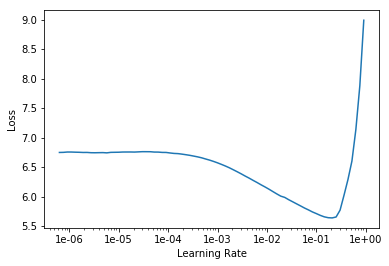

In [33]:
learn.recorder.plot()

In [34]:
learn.freeze()

In [35]:
learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,5.275106,4.788786,0.316310


In [36]:
learn.save('fit_head', with_opt=True)

In [37]:
learn.load('fit_head', with_opt=True);

In [38]:
learn.unfreeze()

In [39]:
learn.fit_one_cycle(10, 1e-3, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,4.555768,4.462184,0.335278
2,4.307718,4.175286,0.364965
3,4.043051,3.958212,0.391389
4,3.781583,3.825122,0.407173
5,3.568018,3.744575,0.417361
6,3.389605,3.699792,0.424082
7,3.257524,3.678602,0.426295
8,3.152715,3.671456,0.428130
9,3.099012,3.672034,0.428591
10,3.066362,3.671679,0.428691


In [40]:
learn.save('fine_tuned', with_opt=True)

In [41]:
learn.load('fine_tuned', with_opt=True);

In [43]:
learn.predict('ରେ ଅପ ଗ୍ ରେ ଡ',n_words=10)

'ରେ ଅପ ଗ୍ ରେ ଡ ିଆନ୍ ▁କୋ ହି ଟ୍ ▁- ▁ଜାଣନ୍ତ ▁x b os ▁୬୩'

In [44]:
learn.save_encoder('fine_tuned_enc')

In [45]:
data_clas = TextClasDataBunch.from_csv(path=path, csv_name='Odia_News_Classification.csv', tokenizer=tokenizer, vocab=oriya_vocab, text_cols=[0], label_cols=label_cols)

In [46]:
data_clas.show_batch()

text,target
"▁x x b os ▁୧୧ ▁ଶହ ▁ସହର ରେ ▁ପହଞ୍ଚି ବ ▁ଜି ଓ ▁ ଗି ଗା ▁ଫାଇ ବର , ▁ ଡେନ ▁ ନେଟ ଓ ୍ ର୍କ ▁ଓ ▁ହା ଥେ ଓ ୍ ▁କେ ବୁଲ ର ▁ସର୍ବାଧିକ ▁ଅଂଶ ଧନ ▁ଖ ରି ଦ ▁କଲା ▁ରି ଲା ଏନ୍ ସ",business
"▁x x b os ▁ନି ଦା ହାସ ▁ଟ୍ରଫି : ▁ଓ ୍ ା ସିଙ୍ଗ ଟନ୍ ▁ ଙ୍କୁ ▁୩ଟି ▁ଓ ୍ ିକ େଟ୍ ▁ , ▁ବାଂଲାଦେଶ ▁ବିପକ୍ଷ ରେ ▁ଭାରତ ▁୧୭ ▁ ର ନ୍ ▁ ରେ ▁ବିଜୟୀ , ▁ଫାଇନାଲ ୍ ▁ ରେ ...",sports
"▁x x b os ▁କୋଲକାତା ▁ଟି - ୨୦ : ▁ କୁ ଲ ଦୀପ ଙ୍କୁ ▁୩ ▁ଓ ୍ କେଟ ୍ ▁ , ▁ୱେଷ୍ଟ ଇଣ୍ଡ ିଜ୍ ▁ ର ▁ବ୍ୟା ଟି ଂ ▁ବିପର୍ଯ୍ୟୟ ▁ପରେ ▁ଭାରତ କୁ ▁ମିଳିଲା ▁୧୧୦ ▁ ର ନ୍ ▁ ...",sports
"▁x x b os ▁ବି ଦା ▁ହେଲେ ▁ଆର୍ଜେଣ୍ଟିନା , ▁ପର୍ ତୁ ଗା ଲ୍ ▁: ▁ଫ୍ରା ନ୍ ▁ସ - ଉ ରୁ ଗୁ ଏ ▁କ୍ ୱାର୍ ଟର ରେ ▁ ମୁହାଁ ମୁ ହିଁ , ▁ଫିକା ▁ପଡ଼ିଲେ ▁ମେ ସି , ...",sports
"▁x x b os ▁ଯୁବ ା ▁ବା ସ୍ କେଟ ବ ଲ୍ ▁ସେ ମି ରେ ▁ସାଇ ନି ଂ ▁ଷ୍ଟାର - ଏମ୍ ▁ବି ସି , ▁କେ ବି ଡ ବ୍ଲ ୁ - ସ ରୋଜ ▁ଓ ୍ ାରି ୟ ର୍ସ",sports


In [47]:
data_clas.sanity_check()

In [48]:
learn = text_classifier_learner(data_clas, drop_mult=0.5)

In [49]:
learn.load_encoder('fine_tuned_enc')

In [50]:
learn.freeze()

In [51]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


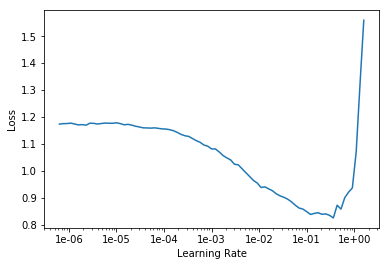

In [52]:
learn.recorder.plot()

In [53]:
learn.loss_func.func

CrossEntropyLoss()

In [54]:
kappa = KappaScore()

In [55]:
learn.metrics = [kappa, accuracy]

In [56]:
learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,kappa_score,accuracy
1,0.429040,0.251198,0.851344,0.905288


In [57]:
learn.save('first-full')

In [58]:
learn.load('first-full');

In [59]:
learn.freeze_to(-2)
learn.fit_one_cycle(5, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))

epoch,train_loss,valid_loss,kappa_score,accuracy
1,0.359809,0.228144,0.877307,0.922126
2,0.285676,0.177375,0.898321,0.935017
3,0.211575,0.153899,0.910943,0.943436
4,0.161906,0.141057,0.921065,0.949750
5,0.134699,0.141584,0.921683,0.950013


In [60]:
learn.save('final')

In [61]:
learn.predict('ମୁମ୍ବାଇ : ଗତବର୍ଷ ବିବାହ ବନ୍ଧନରେ ବାନ୍ଧି ହୋଇଥିଲେ ବଲିଉଡ୍‌ର ଦେଶୀଗର୍ଲ ପ୍ରିୟଙ୍କା ଚୋପ୍ରା ଏବଂ ତାଙ୍କ ପ୍ରେମିକ ନିକ୍‌ ଜୋନ୍‌ସ ।')

(Category entertainment,
 tensor(1),
 tensor([6.4280e-04, 9.8621e-01, 1.3148e-02]))

In [62]:
learn.predict("ମୁମ୍ବାଇ : ବଲିଉଡ୍‌ର ଦବଙ୍ଗ ଷ୍ଟାର ସଲମାନ ଖାନ୍‌ କେବଳ ନିଜ ଫିଲ୍ମ ପାଇଁ ନୁହନ୍ତି, ଲୋକମାନଙ୍କୁ ସାହାଯ୍ୟ କରିବାକୁ ନେଇ ମଧ୍ୟ")

(Category entertainment, tensor(1), tensor([0.0057, 0.9437, 0.0506]))

In [63]:
learn.predict("ଆଗାମୀ ଦିନରେ ବୋଇଂ ୭୩୭ ମ୍ୟାକ୍ସ ୮ ବିମାନ ଅନେକ କମ୍ପାନି ଉଡ଼ାଣ କରୁଥିବାରୁ ସରକାର ଓ ବେସାମରିକ ବିମାନ ଚଳାଚଳ ମହାନିର୍ଦ୍ଦେଶାଳୟ")

(Category business, tensor(0), tensor([9.9981e-01, 4.9716e-18, 1.9255e-04]))

In [64]:
learn.predict("ଦୁଇଦିନ ପାଇଁ ଆୟୋଜନ କରାଯାଇଛି। ହରି ଓମ୍ ଭବନରେ ଅନୁଷ୍ଠିତ ଏହି ଏକ୍ସପୋରେ ଗ୍ରାହକଙ୍କ ପାଇଁ ପୁରୁଣା କାର୍ ବଦଳାଇ ନୂଆ କରା କିଣିବା ")

(Category business, tensor(0), tensor([9.9809e-01, 1.9661e-05, 1.8933e-03]))

In [65]:
learn.predict("ତିରୁବନ୍ତପୁରମ୍‌: କେରଳରେ ଆୟୋଜିତ ଚତୁଃକୋଣୀୟ ୧୯ ବର୍ଷରୁ କମ୍‌ କ୍ରିକେଟ୍‌ ଶୃଙ୍ଖଳାରେ ଅପରାଜେୟ ଭାରତ-ବି ଦଳ ବିଜେତା ଆଖ୍ୟା ହାସଲ ")

(Category sports, tensor(2), tensor([6.8803e-06, 8.8468e-12, 9.9999e-01]))